In [ ]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd


Améliorations possibles : 
- Prendre un autre représentant que le centroïde du cluster
- Faire un clustering différent
- Trouver des méthodes pour améliorer la complexité

Trucs à faire : 
- Comparaison avec des algos vus en cours (matrix profile, pattern decomposition inverse)
- fine tuning des paramètres ($l_M$ par exemple)
- Etudier l'impact du nombre de tirages

On travaille sur norm-sampl

On le teste en accuracy et en temps et on teste des variantes (on teste des hyperparamètres) 

Comparaison avec des trucs vus en cours (entropy...) 


In [ ]:
os.listdir('./data/archive/realKnownCause/realKnownCause')
df=pd.read_csv('./data/archive/realKnownCause/realKnownCause/nyc_taxi.csv')

In [34]:
df['timestamp']=pd.to_datetime(df['timestamp'])
time = np.array(df['timestamp'])

anomalies = NYC marathon (2/11/14), Thanksgiving(27/11/14), Christmas, New Years day, and a snow storm (13-21 11 2014)

In [41]:
len(time)

10320

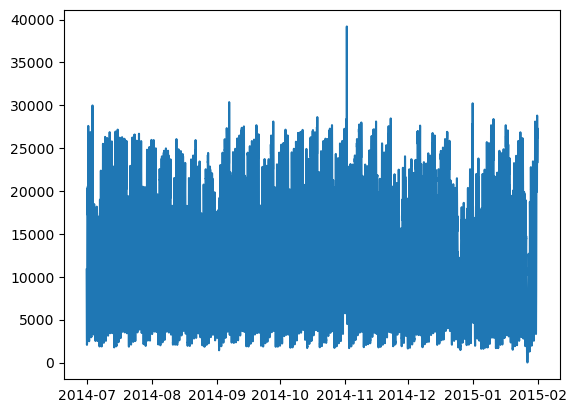

In [40]:
plt.plot(time , np.array(df['value']))